# <font color=darkolivegreen> Стратегия взаимодействия с пользователями для сети фитнес-центров «Культурист-датасаентист»</font> 

Распространённая проблема фитнес-клубов — отток клиентов. Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.

Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество анкет пользователей. Задача — провести анализ и подготовить план действий по удержанию клиентов:
 - спрогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
 - сформировать типичные портреты пользователей: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
 - проанализировать основные признаки, наиболее сильно влияющие на отток;
 - сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
        - выделить целевые группы клиентов;
        - предложить меры по снижению оттока;
        - определить другие особенности взаимодействия с клиентами.
        
## <font color=olive>Описание данных</font>


Заказчик подготовил данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц.
#### <font color=olivedrab>Таблица gym_churn:</font>
Набор данных включает следующие поля:
1. 'Churn' — факт оттока в текущем месяце;

Текущие поля в датасете:
2. Данные пользователя за предыдущий до проверки факта оттока месяц:
 - 'gender' — пол, конкретной информации нет, будем считать, что 1 - женский, 0 - мужской;
 - 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
 - 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
 - Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
 - 'Phone' — наличие контактного телефона;
 - 'Age' — возраст;
 - 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах);

3. Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
 - 'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
 - 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
 - 'Group_visits' — факт посещения групповых занятий;
 - 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
 - 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
 - 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.

#### <font color=olivedrab>Оглавление </font>

1. [Загрузка данных](#загрузка_данных)
2. [Исследовательский анализ данных](#eda)
    * [Средние значения и стандартные отклонения](#mean_std)
    * [Столбчатые диаграммы оставшихся клиентов](#distplot_churn0)
    * [Столбчатые диаграммы клиентов, ушедших в отток](#distplot_churn1)
    * [Матрица корреляций между признаками](#corr)
    * [Вывод](#вывод_eda)  
3. [Модель прогнозирования оттока пользователей](#модель_прогнозирования_оттока)
    * [Деление данных на обучающую и валидационную выборку](#деление)
    * [Обучение модели двумя способами](#обучение)
    * [Вывод метрик после обучения](#вывод_метрик)
    * [Вывод](#вывод_прогноз)
4. [Кластеризация пользователей](#кластеризация)
    * [Матрица расстояний, дендрограмма](#дендрограмма)
    * [Обучение кластеризации алгоритмом K-Means](#kmeans)    
    * [Средние значения признаков для кластеров](#mean_cluster) 
    * [Распределение признака near_location по кластерам](#распределение_near_location)
    * [Распределение признака partner по кластерам](#распределение_partner)
    * [Распределение признака promo_friends по кластерам](#распределение_promo_friends)
    * [Распределение признака contract_period по кластерам](#распределение_contract_period)
    * [Распределение признака group_visits по кластерам](#распределение_group_visits)
    * [Распределение признака avg_additional_charges_total по кластерам](#распределение_avg_additional_charges_total)
    * [Распределение признака lifetime по кластерам](#распределение_lifetime)
    * [Распределение признака avg_class_frequency_current_month по кластерам](#распределение_avg_class_frequency_current_month)
    * [Доля оттока по кластерам](#доля_оттока)
    * [Вывод](#вывод_кластеризация)
5. [Общий вывод](#вывод)

### <font color=olive>Шаг 1. Загрузка данных</font> 

In [181]:
# импортируем данные
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import math as mth
from datetime import datetime, time
from matplotlib import pyplot as plt
from plotly import graph_objects as go
from scipy import stats as st
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

<a id="загрузка_данных"></a>

In [182]:
# сохраним исходную таблицу в переменную:
gym_churn = pd.read_csv('/datasets/gym_churn.csv')
gym_churn.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [183]:
gym_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


В таблице представлены данные о 4 000 клиентах фитнес-центра. Все колонки заполнены. Тип данных столбца month_to_end_contract привести к int64. Так же для удобства можно привести названия столбцов к нижнему регистру.

### <font color=olive>Шаг 2. Исследовательский анализ данных (EDA)</font> 

Изучим средние значения и стандартные отклонения признаков: <a id="eda"></a>

In [184]:
# приводим названия столбцов к нижнему регистру:
gym_churn.columns = gym_churn.columns.str.lower()

gym_churn['month_to_end_contract'] = gym_churn['month_to_end_contract'].astype('int64')

<a id="mean_std"></a>

In [185]:
gym_churn.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Типичный клиент фитнес-центра - 29 летнего возраста, мужчин и женщин примерно попровну; проживающий рядом с фитнес-центром, указавший телефон для связи. Абонемент приобретен на 1 месяц. Клиент посещает фитнес-центр самостоятельно, в среднем 1-2 раза в неделю, тратит от 136 до 146 у.е. на доп услуги. Стандартные отклонения признаков contract_period, age, avg_additional_charges_total, month_to_end_contract, lifetime, avg_class_frequency_total и avg_class_frequency_current_month говорят о том, что диапазоны значений этих признаков сильно различаются. Веса для разных признаков должны учитывать масштаб этих признаков, для этого в дальнейшем необходимо провести стандартизацию.

Посмотрим на средние значения признаков в двух группах - тех, кто ушел, в отток и тех, кто остался:

In [186]:
gym_churn.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


А также построим столбчатые гистограммы и распределения признаков для тех, кто ушел, и тех, кто остался:

<a id="distplot_churn0"></a>

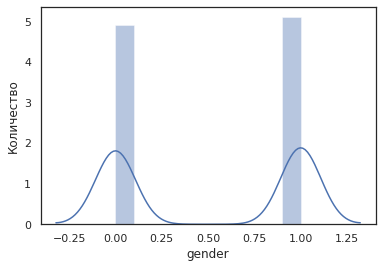

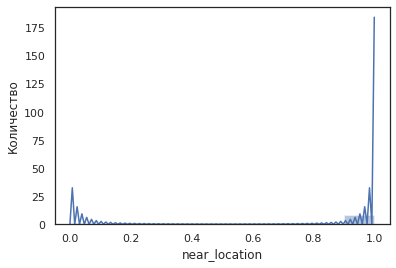

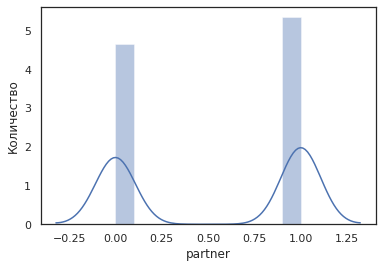

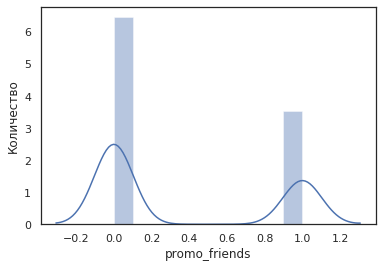

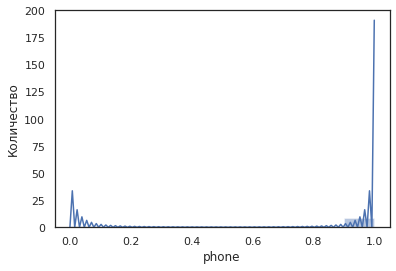

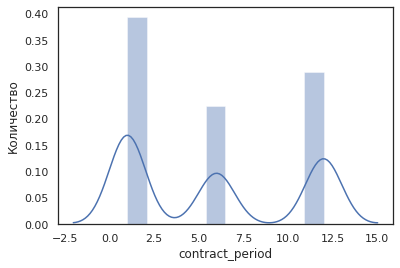

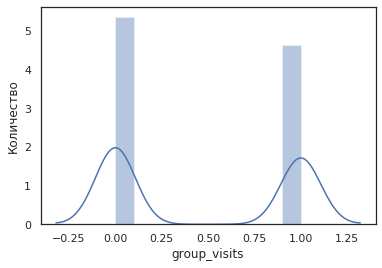

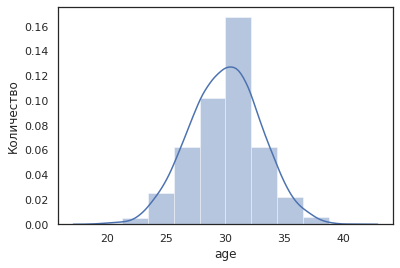

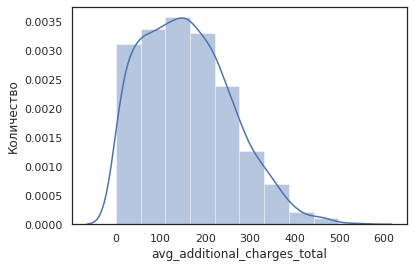

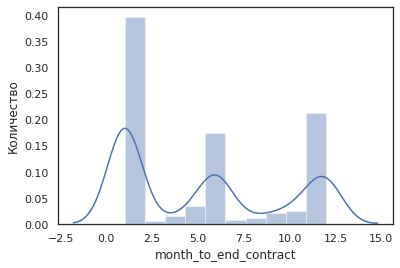

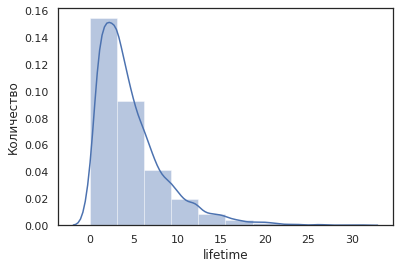

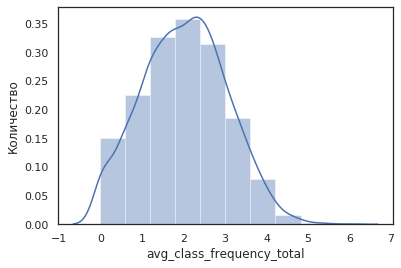

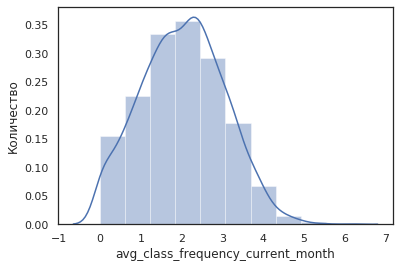

/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning:

invalid value encountered in true_divide

/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars



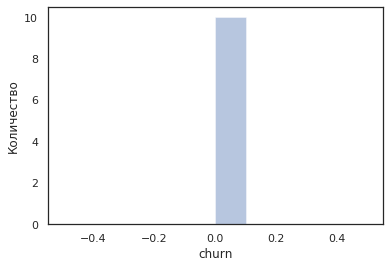

In [187]:
# столбчатые диаграммы оставшихся клиентов:
for feature in gym_churn.columns:
    sns.distplot(gym_churn.query('churn == 0')[feature], bins = 10)
    plt.ylabel ('Количество') 
    plt.show()

Для клиентов, не ушедших в отток, характерны следующие значения признаков:
 - мужчин и женщин примерно попровну;
 - проживание рядом с фитнес-центром;
 - участник партнерской программы; 
 - указание своего контактного номера;
 - абонемент на 6 месяцев;
 - чуть меньше половины этих пользователей посещает групповые занятия;
 - возраст - 30 лет;
 - тратит на доп услуги примерно 158,5 у.е.;
 - количество оставшихся месяцев до конца абонемента - 5;
 - количество посещений в неделю 2;
 - количество посещений за все время 2.
 <a id="distplot_churn1"></a>

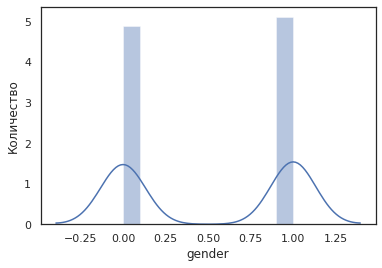

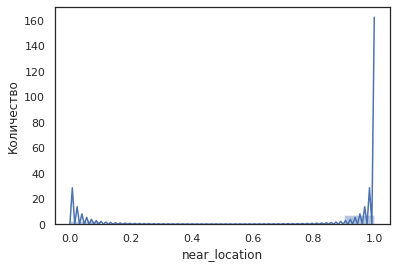

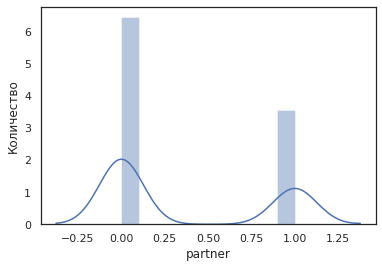

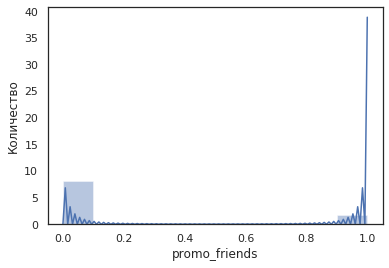

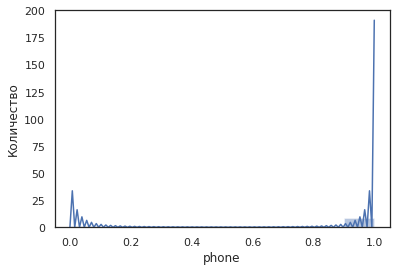

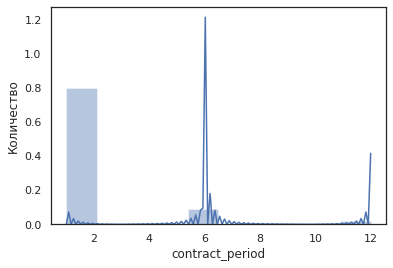

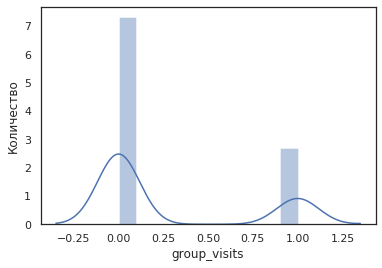

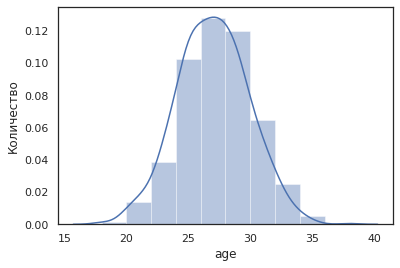

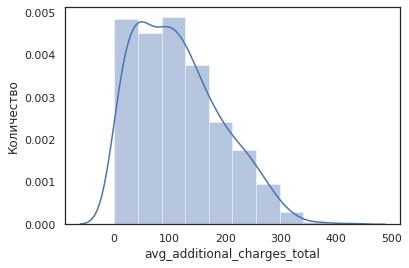

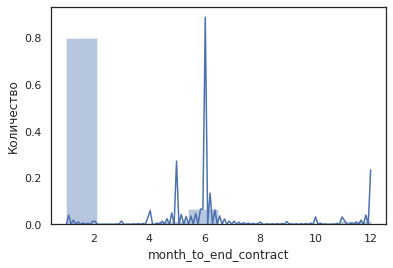

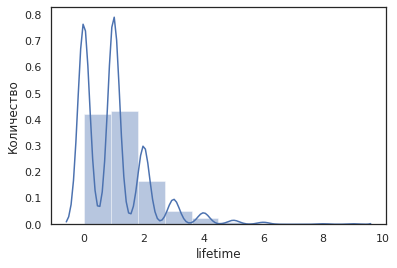

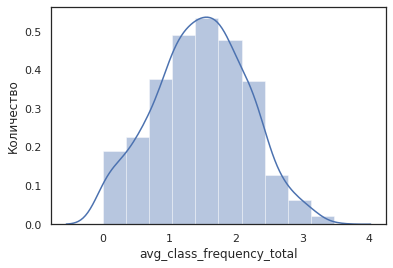

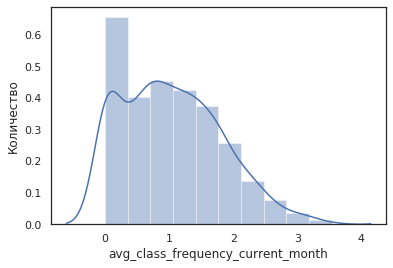

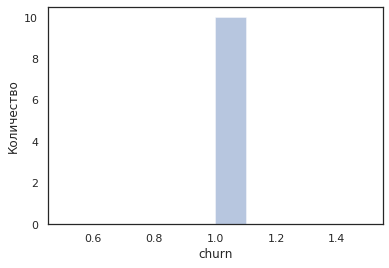

In [188]:
# столбчатые диаграммы клиентов, ушедших в отток:
for feature in gym_churn.columns:
    sns.distplot(gym_churn.query('churn == 1')[feature], bins = 10)
    plt.ylabel ('Количество') 
    plt.show()

Для клиентов, ушедших в отток, характерны следующие значения признаков:
 - мужчин и женщин примерно попровну;
 - проживание рядом с фитнес-центром;
 - указание своего контактного номера;
 - абонемент на 1 месяц;
 - возраст - 27 лет;
 - тратит на доп услуги примерно 115 у.е.;
 - количество посещений в неделю 1;
 - количество посещений за все время 1.

Рассмотрим матрицу корреляций между признаками:

<a id="corr"></a>

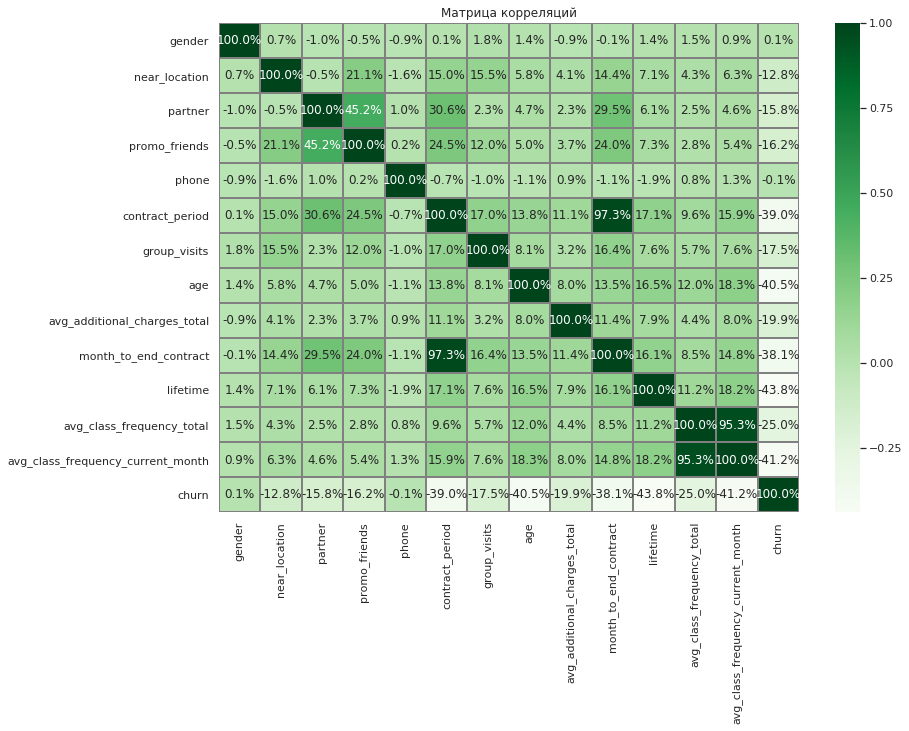

In [189]:
cm = gym_churn.corr() #вычисляем матрицу корреляций

# строим тепловую карту матрицы корреляций:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Матрица корреляций')
sns.heatmap(cm, annot=True, fmt='.1%', linewidths=1, linecolor='gray', cmap="Greens");

Пары признаков 
 - "срок абонемента" - "количество месяцев до конца абонемета";
 - "среднее количество посещений в неделю за последний месяц" - "среднее количество посещений в неделю за период абонемента"

имеют между собой сильную корреляцию. Для дальнейшего анализа удалим по одному признаку из этих пар, который в наименьшей степени влияет на целевой признак, а именно:
 - количество месяцев до конца абонемента, его влияние на целевой признак - отток клиента "-38,1", парного признака "-39";
 - среднее количество посещений в неделю за период абонемента, его влияние "-25", парного признака "-41,2".

In [190]:
# избавляемся от мультиколлинеарности
gym_churn = gym_churn.drop(['month_to_end_contract', 'avg_class_frequency_total'], axis = 1)

Особо сильного влияния на отток клиентов из фитнес-центра ни один из признаков не оказывает. Но можно предположть, что признаки
 - время с момента первого обращения в фитнес центр;
 - среднее количество посещений за месяц;
 - возраст клиента;
 - срок абонемента
 
среди представленных оказывают наиболее существенное влияние на целевой признак.

### <font color=olive>Вывод</font> <a id="вывод_eda"></a> 

В процессе исследовательского анализа данных были удалены скоррелированные между признаки:
 - количество месяцев до конца абонемента (в пользу признака срок абонемента);
 - среднее количество посещений за период абонемента (в пользу признака среднее количество посещений за месяц).
 
Так же выдвинута гипотеза, что из предложенных признаков наиболее сильное влияние на отток клиентов оказывают признаки:
 - время с момента первого обращения в фитнес центр;
 - среднее количество посещений за месяц;
 - возраст клиента;
 - срок абонемента

### <font color=olive>Шаг 3. Модель прогнозирования оттока пользователей</font> 

<a id="модель_прогнозирования_оттока"></a> 

Разделим данные на признаки (матрица X) и целевую переменную (y):
<a id="деление"></a> 

In [191]:
X = gym_churn.drop('churn', axis = 1)
y = gym_churn['churn']

# резделим модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# стандартизируем данные 
scaler = StandardScaler()
scaler.fit(X_train) 
X_train_st = scaler.transform(X_train) 
X_test_st = scaler.transform(X_test) 
X_st = scaler.transform(X)

Обучим модель на train-выборке двумя способами:
 - логистической регрессией;
 - случайным лесом:
 <a id="обучение"></a> 

In [192]:
# зададим алгоритмы для моделей
# - логистической регрессии:
lr_model= LogisticRegression(random_state=0)

# - на основе алгоритма случайного леса:
rf_model = RandomForestClassifier(n_estimators = 100, random_state=0)

# обучим модели на train-выборке:
# модель логистической регрессии:
lr_model.fit(X_train_st, y_train)

# модель на основе алгоритма случайного леса:
rf_model.fit(X_train_st, y_train)

# воспользуемся уже обученной моделью, чтобы сделать прогнозы
# для модели логистической регрессии:
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]

# для модели на основе алгоритма случайного леса:
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



Модели обучены, теперь оценим метрики accuracy, precision и recall для моделей на валидационной выборке, для этого сначала определим функцию, которая будет выводить необходимые метрики:
 <a id="вывод_метрик"></a> 

In [193]:
def print_all_metrics(y_true, y_pred, y_proba, title = 'Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))

print_all_metrics(y_test, lr_predictions, lr_probabilities , title='Метрики для модели логистической регрессии:')
print_all_metrics(y_test, rf_predictions, rf_probabilities, title = 'Метрики для модели случайного леса:')

Метрики для модели логистической регрессии:
	Accuracy: 0.90
	Precision: 0.79
	Recall: 0.82
Метрики для модели случайного леса:
	Accuracy: 0.90
	Precision: 0.81
	Recall: 0.75


### <font color=olive>Вывод</font> <a id="вывод_прогноз"></a> 
Обе модели правильно прогнозируют 90% ответов. Для модели логистической регрессии точность (Precision) составляет 0,79, а для модели случайного леса - 0,81, то есть для модели случайного леса 81% положительных решений правильные (против 79% для модели логистической регрессии). Метрика Recall, показывающая полноту обнаружения факта оттока клиентов, больше у модели логистической регрессии - 82% против 75% для модели случайного леса.

Для нашего прогноза оттока клиентов лучше использовать прогнозирование моделью логистической регрессии.

### <font color=olive>Шаг 4. Кластеризация пользователей</font>  <a id="кластеризация"></a>

<a id="дендрограмма"></a>

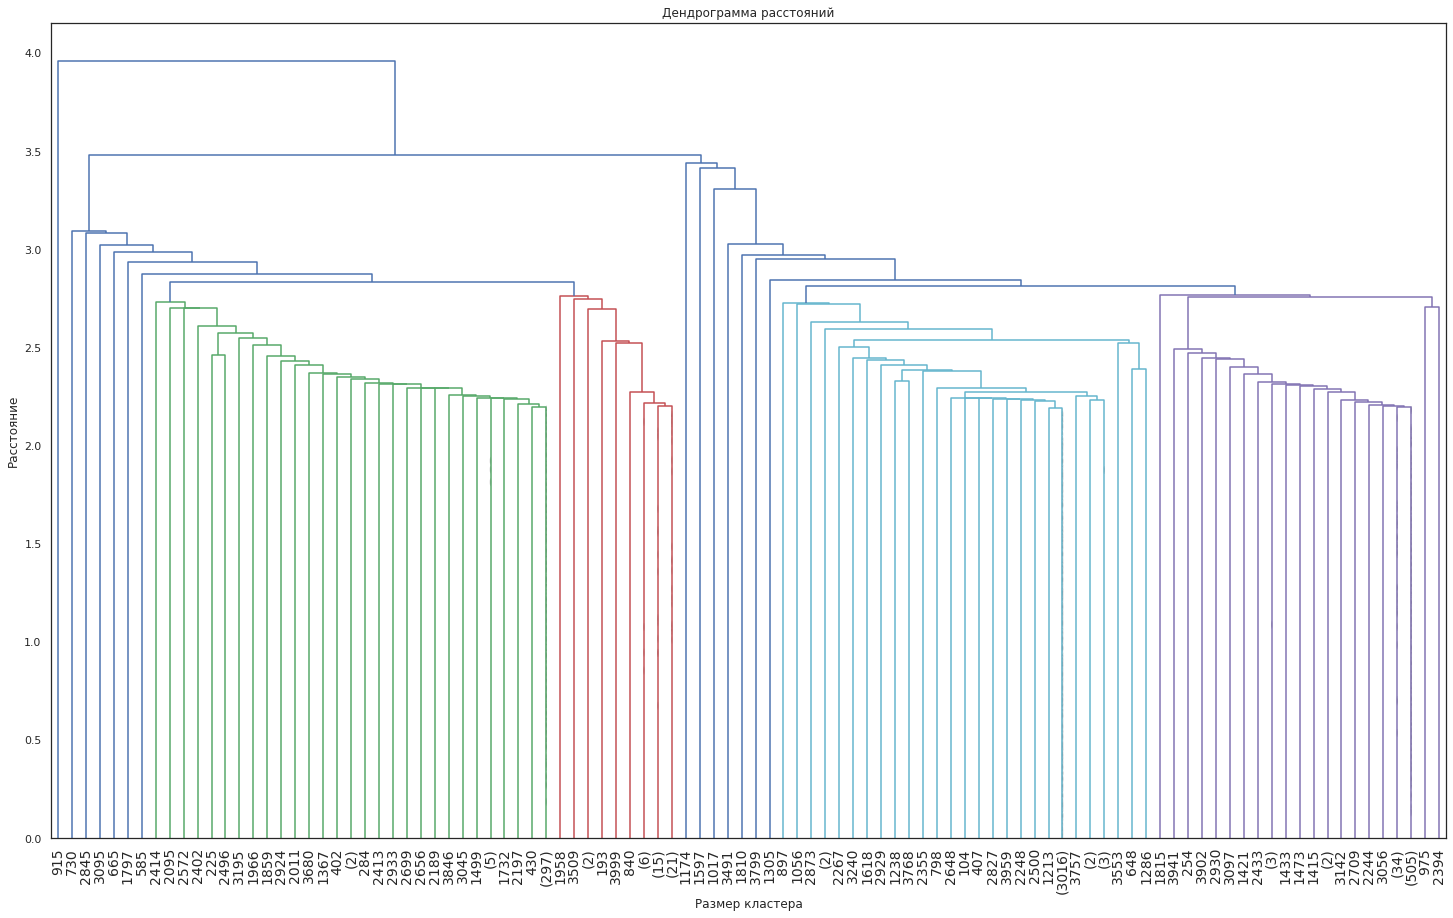

In [194]:
# построим матрицу расстояний:
Z = linkage(X_st)

# построим дендрограмму:
fig = plt.figure(figsize=(25, 15))
plt.title('Дендрограмма расстояний')
plt.xlabel ('Размер кластера')
plt.ylabel ('Расстояние') 
dn = dendrogram(Z,  truncate_mode = 'lastp', p = 100, leaf_rotation=90., leaf_font_size=14, show_contracted = True)
plt.show()

На основании полученной дендрограммы можно выделить 5 явных кластеров клиентов. Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов. Число кластеров примем n=5:

<a id="kmeans"></a>

In [195]:
# задаём модель k_means с числом кластеров 5
km = KMeans(n_clusters = 5, random_state=0)

# прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 4)
labels = km.fit_predict(X_st)

# сохраняем метки кластера в поле таблицы
gym_churn['client_cluster'] = labels

<a id="mean_cluster"></a>

In [196]:
# выводим статистику по средним значениям признаков по кластеру
gym_churn_by_cluster = gym_churn.groupby('client_cluster').mean().reset_index()
gym_churn_by_cluster

,client_cluster,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_current_month,churn
0,0,0.497967,0.995935,0.897358,1.000000,1.0,6.913618,0.523374,29.570122,152.807198,4.223577,1.917736,0.123984
1,1,0.536998,0.995772,0.402748,0.014799,1.0,6.529598,0.523256,30.744186,176.192557,5.642706,2.339566,0.010571
2,2,0.499112,1.000000,0.202487,0.065719,1.0,1.980462,0.305506,27.747780,123.049677,1.975133,1.253345,0.533748
3,3,0.500000,0.000000,0.489247,0.078853,1.0,2.994624,0.232975,28.679211,137.125763,2.974910,1.597146,0.403226
4,4,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,3.940415,1.723967,0.266839


Для всех кластеров характерно примерно одинаковое распределение мужчин и женщин, возраст клиентов всех кластеров находится в диапазоне от 18 до 40 лет.

Построим распределения признаков для кластеров:

<a id="распределение_near_location"></a> 

/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning:

invalid value encountered in true_divide

/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars



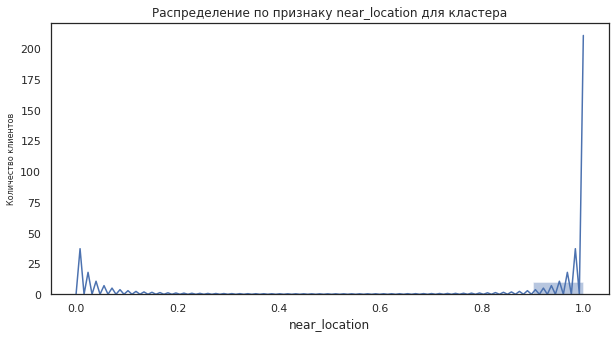

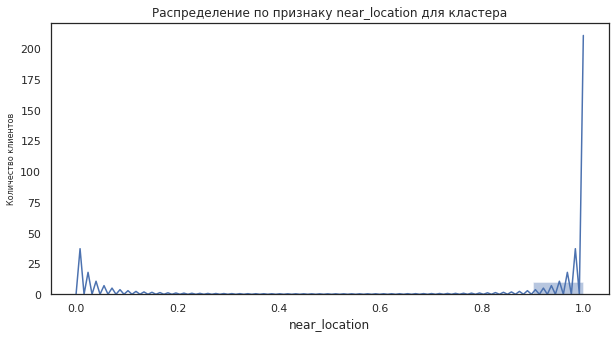

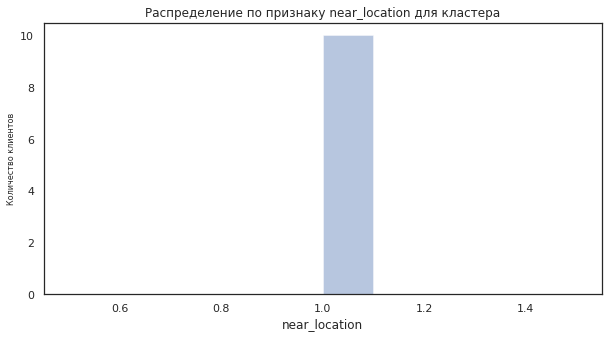

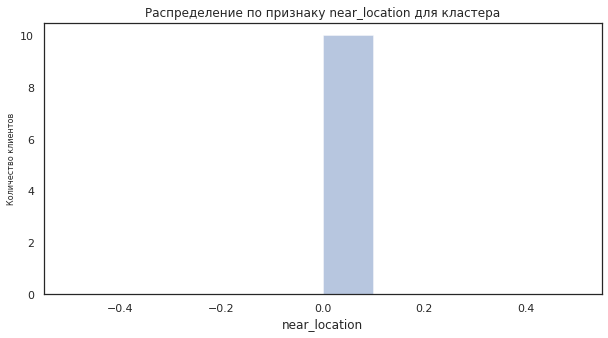

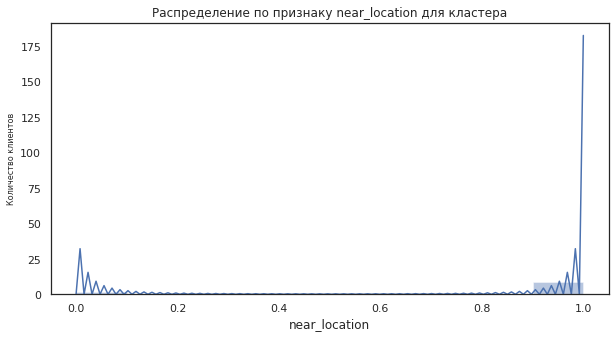

In [197]:
# для признака near_location
for data in [gym_churn.query('client_cluster == 0'), gym_churn.query('client_cluster == 1'), gym_churn.query('client_cluster == 2'), gym_churn.query('client_cluster == 3'), gym_churn.query('client_cluster == 4')]:
    plt.figure(figsize=(10, 5))
    plt.title("Распределение по признаку near_location для кластера", size=12)
    plt.ylabel("Количество клиентов", size=8)
    sns.distplot(data['near_location'], bins = 10)

В первом, втором, третьем и пятом кластерах преобладающее большинство клиентов (а в третьем вообше все) проживают рядом с фитнес-центром.

В четвертом кластере собраны клиенты, которые живут далеко о фитнес-центра.

<a id="распределение_partner"></a> 

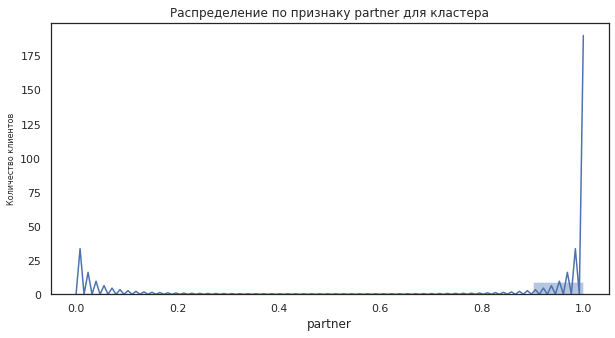

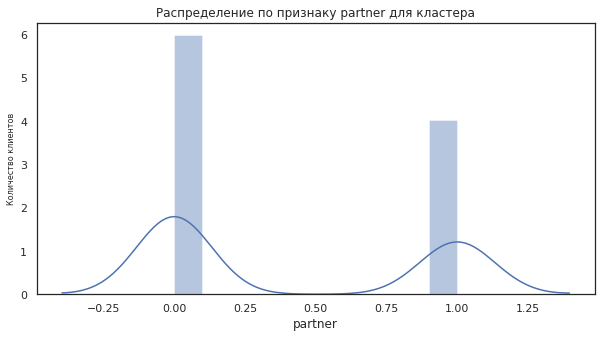

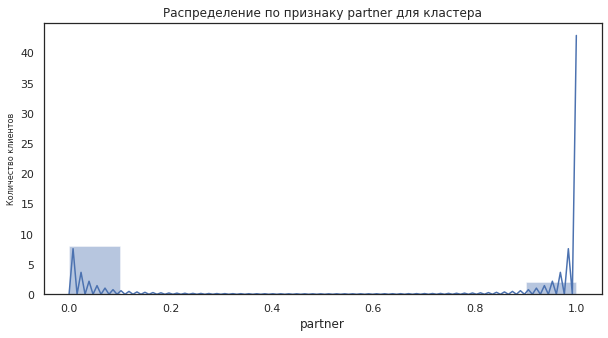

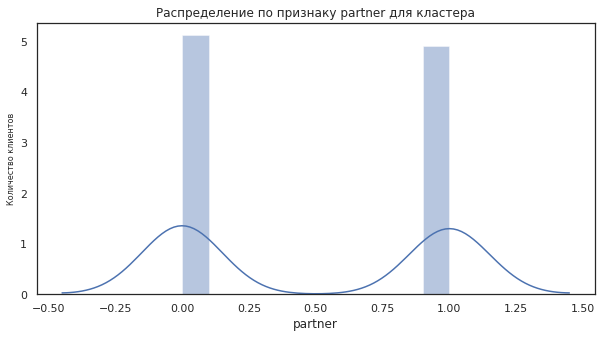

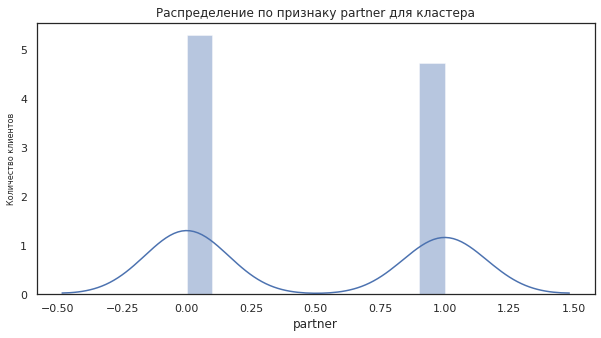

In [198]:
# для признака partner
for data in [gym_churn.query('client_cluster == 0'), gym_churn.query('client_cluster == 1'), gym_churn.query('client_cluster == 2'), gym_churn.query('client_cluster == 3'), gym_churn.query('client_cluster == 4')]:
    plt.figure(figsize=(10, 5))
    plt.title("Распределение по признаку partner для кластера", size=12)
    plt.ylabel("Количество клиентов", size=8)
    sns.distplot(data['partner'], bins = 10)

В первом кластере большинство клиентов воспользовались партнерской программой фитнес-центра,

клиенты вторго, четвертого и пятого кластеров по этому признаку разделились пополам,

преобладающее большинство клиентов третьего кластера не воспользовались партнерской программой.

<a id="распределение_promo_friends"></a> 

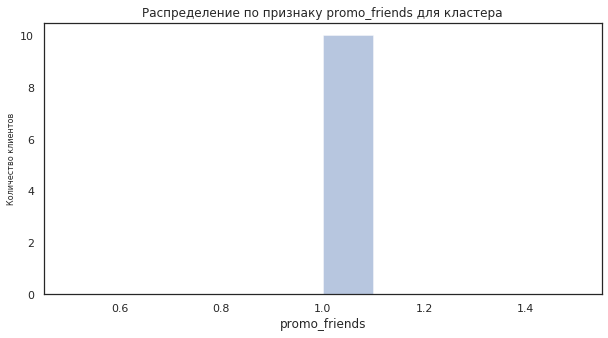

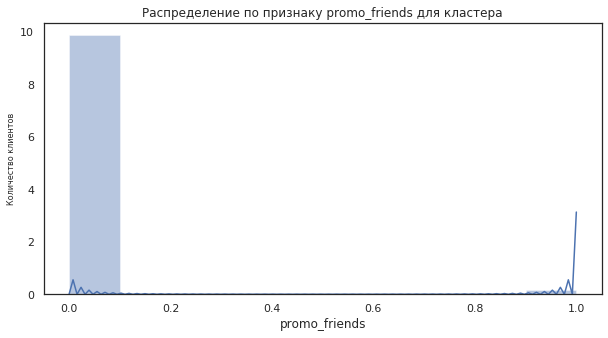

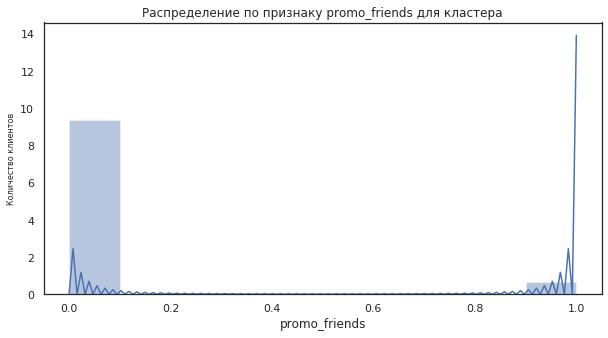

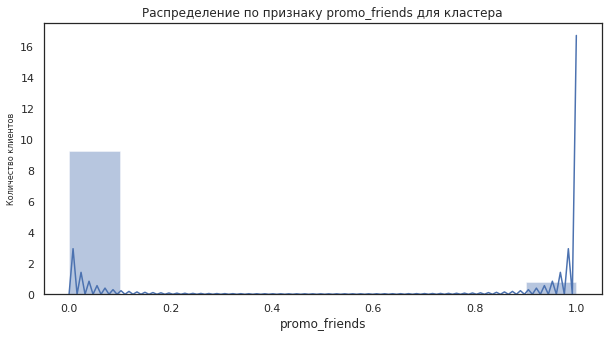

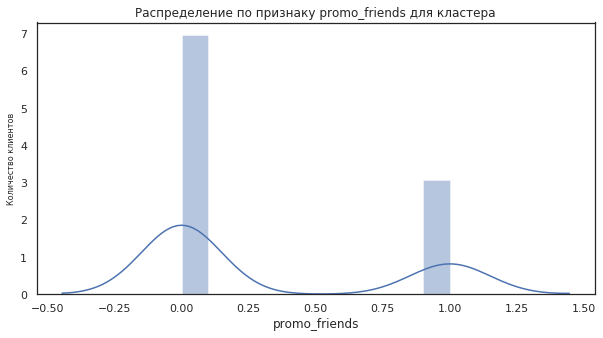

In [199]:
# для признака promo_friends
for data in [gym_churn.query('client_cluster == 0'), gym_churn.query('client_cluster == 1'), gym_churn.query('client_cluster == 2'), gym_churn.query('client_cluster == 3'), gym_churn.query('client_cluster == 4')]:
    plt.figure(figsize=(10, 5))
    plt.title("Распределение по признаку promo_friends для кластера", size=12)
    plt.ylabel("Количество клиентов", size=8)
    sns.distplot(data['promo_friends'], bins = 10)

Все клиенты первого кластера пришли по промо-коду от уже посещающих фитнес-центр друзей.

<a id="распределение_contract_period"></a> 

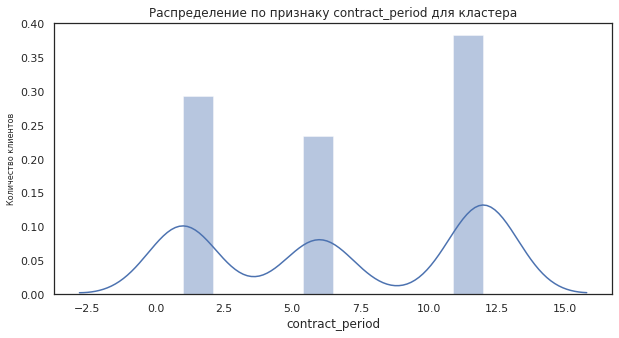

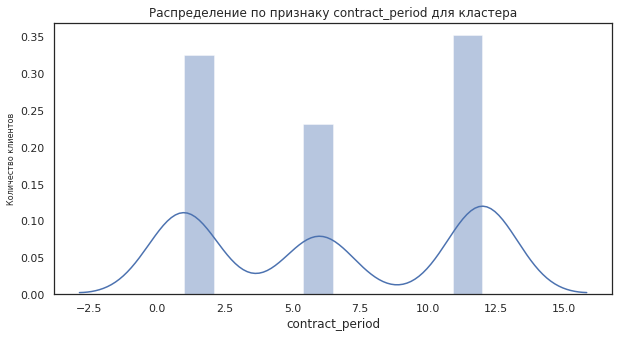

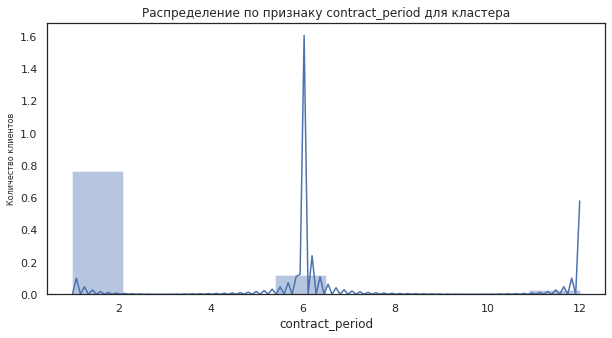

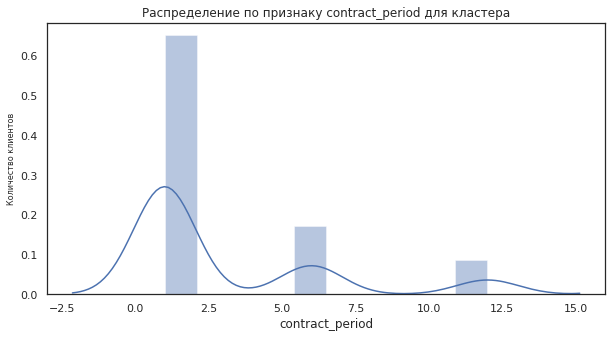

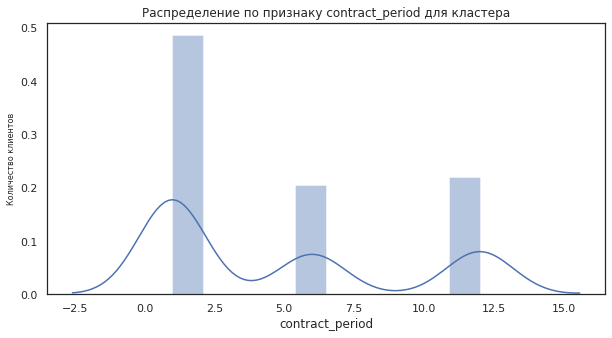

In [200]:
# для признака contract_period
for data in [gym_churn.query('client_cluster == 0'), gym_churn.query('client_cluster == 1'), gym_churn.query('client_cluster == 2'), gym_churn.query('client_cluster == 3'), gym_churn.query('client_cluster == 4')]:
    plt.figure(figsize=(10, 5))
    plt.title("Распределение по признаку contract_period для кластера", size=12)
    plt.ylabel("Количество клиентов", size=8)
    sns.distplot(data['contract_period'], bins = 10)

Почти 40% клиенты первого кластера предпочитают абонемент на 12 месяцев.

Клиенты второго кластера покупают абонементы на 1 месяц или на 12, реже - на 6.

Клиенты третьего кластера предпочитают абонемент на 1 месяц, реже на 6 и почти не покупают абонемент на 12 месяцев.

Клиенты четвертого кластера ведут себя аналогично клиентам третьего.
 
Половина клиентов пятого кластера приобретают абонемент на 1 месяц, остальные - на 6 и 12 месяцев.

<a id="распределение_group_visits"></a> 

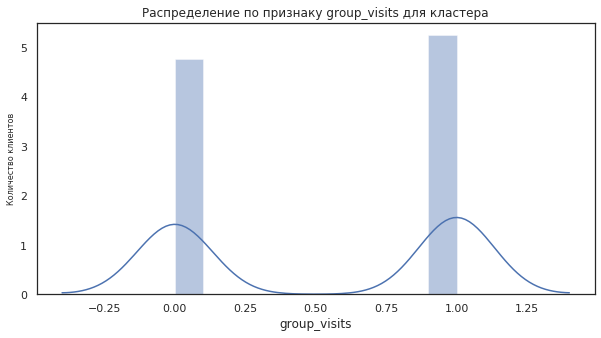

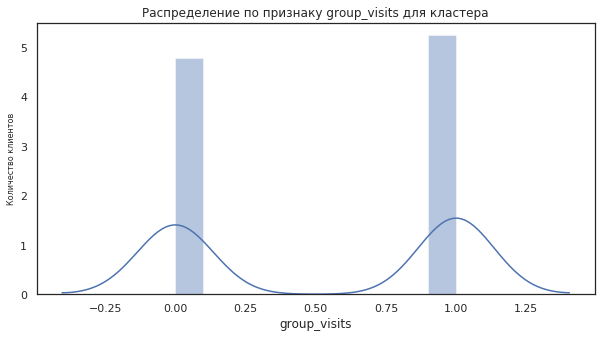

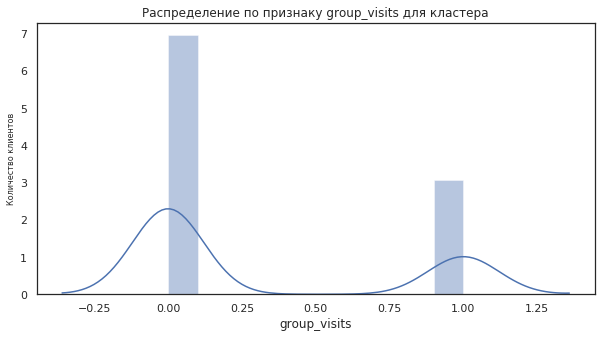

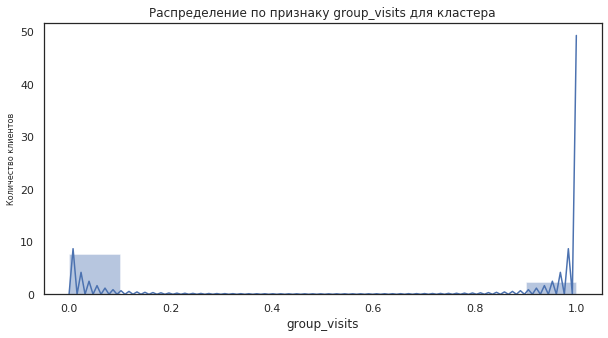

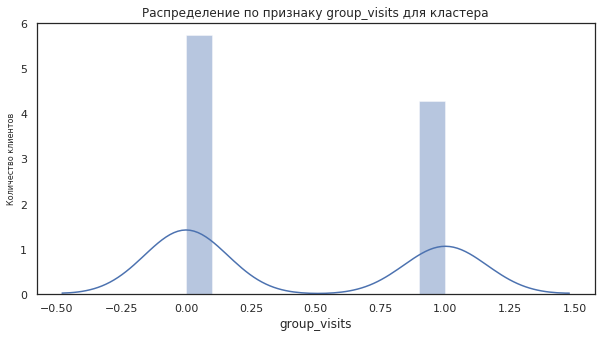

In [201]:
# для признака group_visits
for data in [gym_churn.query('client_cluster == 0'), gym_churn.query('client_cluster == 1'), gym_churn.query('client_cluster == 2'), gym_churn.query('client_cluster == 3'), gym_churn.query('client_cluster == 4')]:
    plt.figure(figsize=(10, 5))
    plt.title("Распределение по признаку group_visits для кластера", size=12)
    plt.ylabel("Количество клиентов", size=8)
    sns.distplot(data['group_visits'], bins = 10)

Примерно половина клиентов первого, второго и пятого кластеров посещают групповые занятия, клиенты второго и третьего кластеров посещают групповые занятия редко.

<a id="распределение_avg_additional_charges_total"></a> 

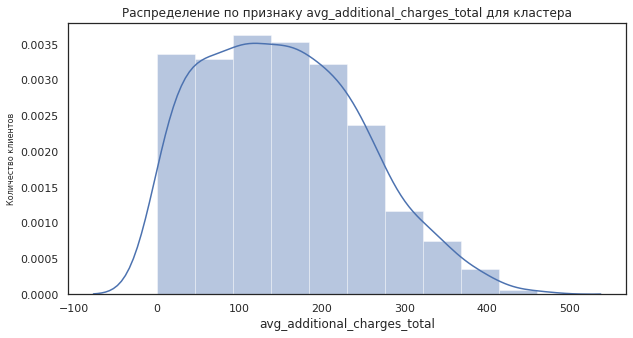

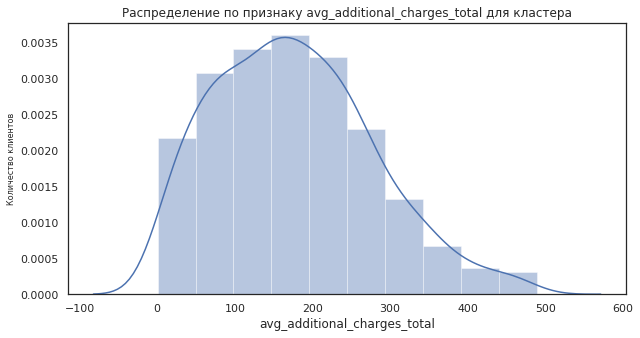

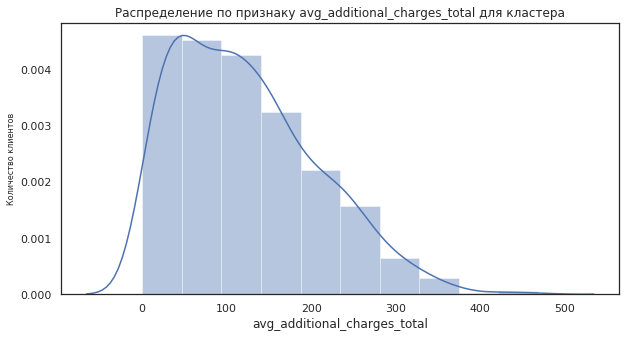

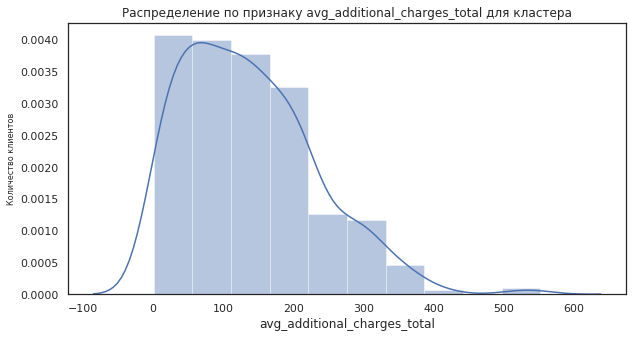

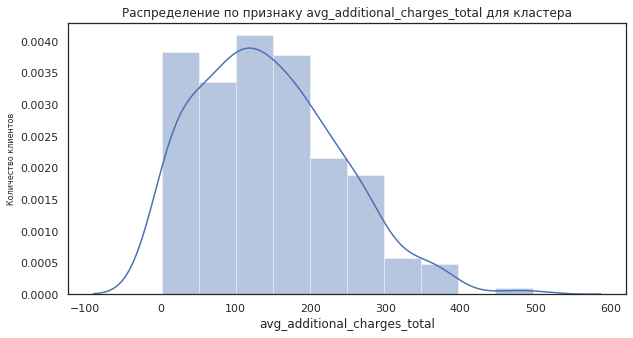

In [202]:
# для признака avg_additional_charges_total
for data in [gym_churn.query('client_cluster == 0'), gym_churn.query('client_cluster == 1'), gym_churn.query('client_cluster == 2'), gym_churn.query('client_cluster == 3'), gym_churn.query('client_cluster == 4')]:
    plt.figure(figsize=(10, 5))
    plt.title("Распределение по признаку avg_additional_charges_total для кластера", size=12)
    plt.ylabel("Количество клиентов", size=8)
    sns.distplot(data['avg_additional_charges_total'], bins = 10)

Большинство клиентов первого кластера в среднем тратят на доп услуги около 150 у.е., второго от 150 у.е. до 200 у.е. Клиенты третьего, четвертого и пятого кластеров тратят от 100 у.е. до 150 у.е.

<a id="распределение_lifetime"></a> 

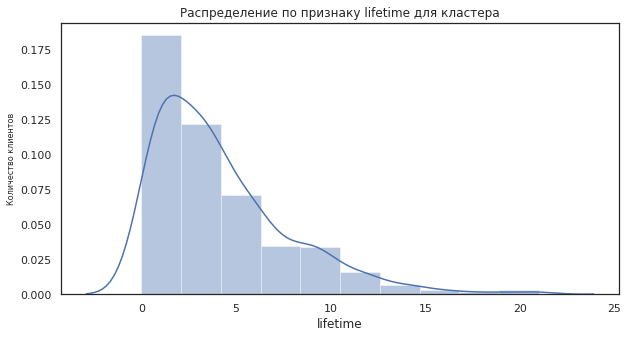

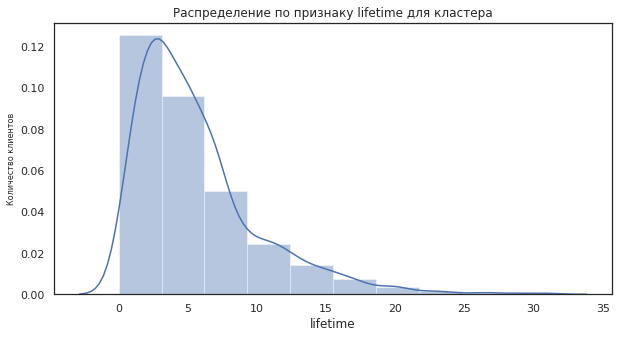

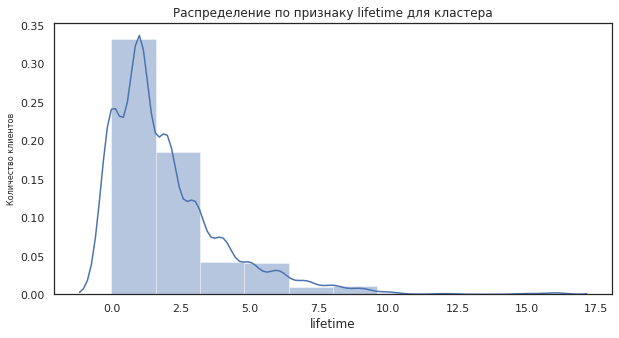

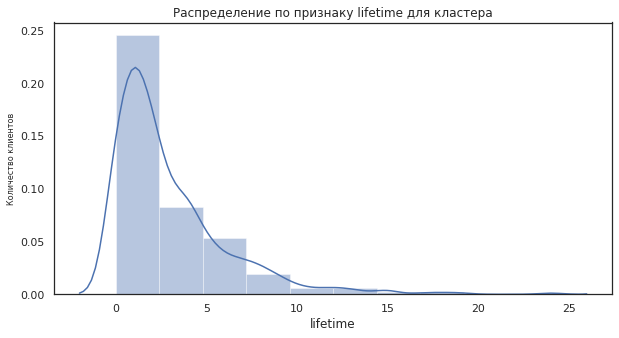

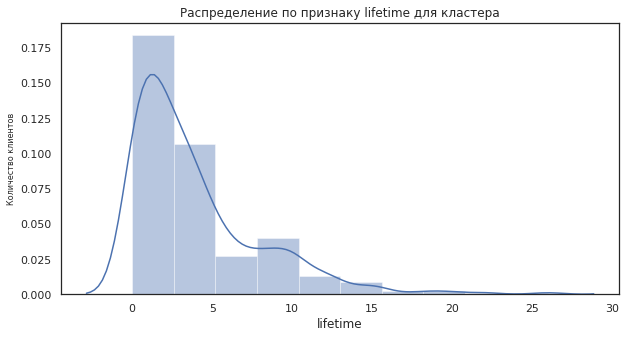

In [203]:
# для признака lifetime
for data in [gym_churn.query('client_cluster == 0'), gym_churn.query('client_cluster == 1'), gym_churn.query('client_cluster == 2'), gym_churn.query('client_cluster == 3'), gym_churn.query('client_cluster == 4')]:
    plt.figure(figsize=(10, 5))
    plt.title("Распределение по признаку lifetime для кластера", size=12)
    plt.ylabel("Количество клиентов", size=8)
    sns.distplot(data['lifetime'], bins = 10)

Основное количество клиентов фитнес-центра - новые клиенты, время с их первого обращения 2 месяца.

<a id="распределение_avg_class_frequency_current_month"></a> 

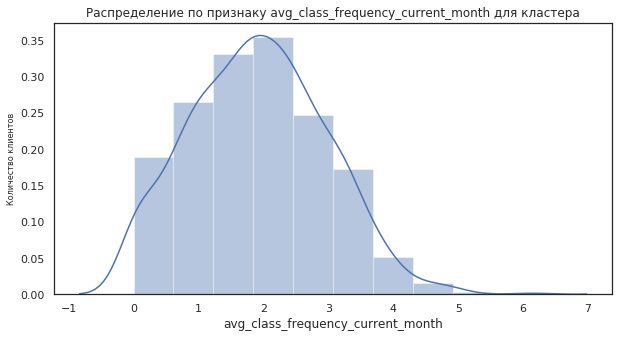

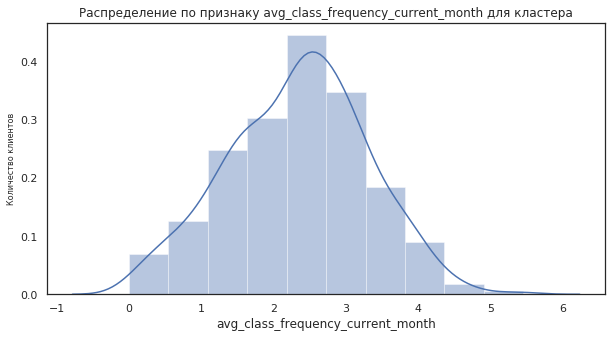

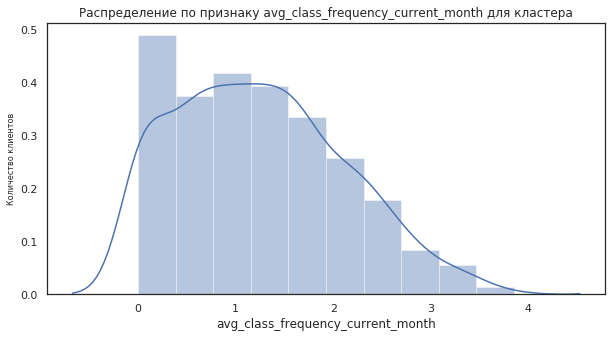

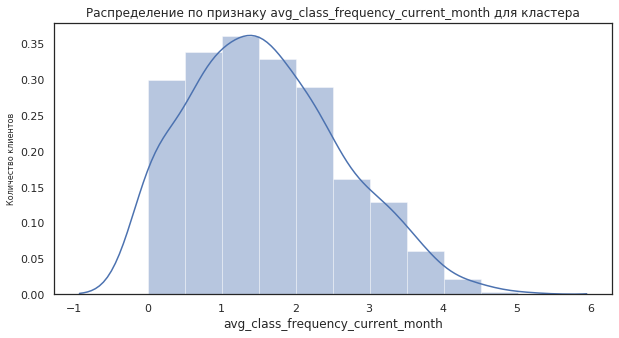

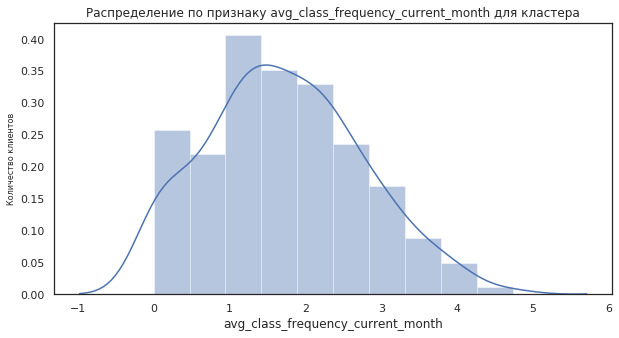

In [204]:
# для признака avg_class_frequency_current_month
for data in [gym_churn.query('client_cluster == 0'), gym_churn.query('client_cluster == 1'), gym_churn.query('client_cluster == 2'), gym_churn.query('client_cluster == 3'), gym_churn.query('client_cluster == 4')]:
    plt.figure(figsize=(10, 5))
    plt.title("Распределение по признаку avg_class_frequency_current_month для кластера", size=12)
    plt.ylabel("Количество клиентов", size=8)
    sns.distplot(data['avg_class_frequency_current_month'], bins = 10)

Для клиентов первого, второго кластеров характерно двухразовое посещение фитнес-центра в неделю. Клиенты остальных кластеров посещают фитнес-центр в среднем 1 раз, реже - 2.
<a id="доля_оттока"></a> 
Доля оттока для каждого кластера рассчитана в столбце churn таблицы gym_churn_by_cluster:

In [205]:
gym_churn_by_cluster

,client_cluster,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_current_month,churn
0,0,0.497967,0.995935,0.897358,1.000000,1.0,6.913618,0.523374,29.570122,152.807198,4.223577,1.917736,0.123984
1,1,0.536998,0.995772,0.402748,0.014799,1.0,6.529598,0.523256,30.744186,176.192557,5.642706,2.339566,0.010571
2,2,0.499112,1.000000,0.202487,0.065719,1.0,1.980462,0.305506,27.747780,123.049677,1.975133,1.253345,0.533748
3,3,0.500000,0.000000,0.489247,0.078853,1.0,2.994624,0.232975,28.679211,137.125763,2.974910,1.597146,0.403226
4,4,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,3.940415,1.723967,0.266839


Общая доля оттока по фитнес-центру:

In [206]:
(gym_churn.query('churn == 1')['churn'].count() / gym_churn['churn'].count()) * 100

26.525

К надежным клиентам фитнес-центра можно отнести клиеентов 1 и 2 кластеров. Остальным нужно уделить больше внимания.

### <font color=olive>Вывод</font> <a id="вывод_кластеризация"></a> 
После кластеризации на основании K-Means с числом кластеров 5, общее количество клиентов было разбито на 5 групп:
 - наименьшее количество оттоков характерно для кластера, в котором большинство 31-летних клиентов живет рядом с фитнес-центром, срок их абонемента практически всегда 6 или 12 месяцев, они посещают групповые занятия, тратят больше остальных клиентов, в среднем посещают фитнес-центр 2 раза в неделю, а с момента первого обращения в фитнес-центр прошло в среднем 5,5 месяцев;
 - наибольшее количество оттоков характерно для кластера (более половины), в котором клиентам 28 лет, у них самый маленький срок абонемета, почти всегда 1 месяц, редко - 6, они практически не посещают групповые занятия, тратят меньше всех денег на дополнительные услуги, в неделю ходят 1-2 раза, с момента первого обращения в фитнес-центр прошло около 2 месяцев.

### <font color=olive>Общий вывод</font> <a id="вывод"></a> 

В ходе исследования построена модель прогнозирования оттока пользователей. Для прогноза оттока клиентов фитнес-центра на уровне следующего месяца предпочтительнее использовать модель логистической регрессии.

Проведена кластеризация пользователей, по результатам которой клиенты были распределены на 5 кластеров. Было выделено 2 кластера надежных клиентов. 3 кластерам клиентов следует уделять большее внимание:

1) рассказать о проводимых групповых занятиях;

2) рассказать о партнерах, возможно клиент является его сотрудником и сможет получить скидку на покупку следующего абонемента;



3) рассказать о преимуществах более долгосрочного абонемента;

